In [1]:
#Data analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing and Feature Engineering
from textblob import TextBlob
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

#Model Selection and Validation
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score



# Data Analysis

In [2]:
train_tweets = pd.read_csv("data//train_tweets.csv")
test_tweets = pd.read_csv("data//test_tweets.csv")

In [3]:
train_tweets.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
test_tweets.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [5]:
train_tweets['length'] = train_tweets['tweet'].apply(len)

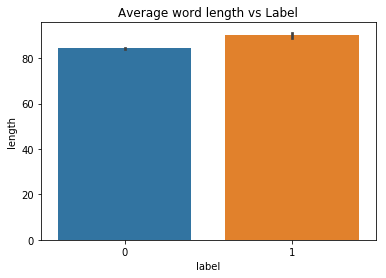

In [6]:
fig1 = sns.barplot('label','length',data = train_tweets)
plt.title("Average word length vs Label")
plot = fig1.get_figure()
plot.savefig('Barplot.png')

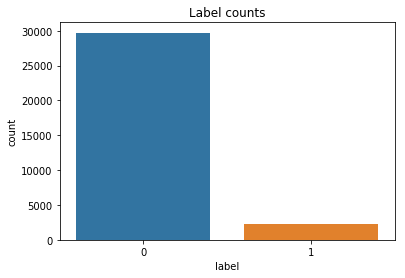

In [7]:
fig2 = sns.countplot('label',data = train_tweets)
plt.title("Label counts")
plot = fig2.get_figure()
plot.savefig('Countplot.png')

# Feature Engineering

In [8]:
def text_processing(tweet):
    #Removing punctuations
    def rem_punc(tweet):
        tweet_blob = TextBlob(tweet)
        return ' '.join(tweet_blob.words)
    no_punc_tweet = rem_punc(tweet)
    
    #Removing stopwords and unusual symbols
    def rem_stop_sym(tweet):
        tweet_list = [ele for ele in tweet.split() if ele != 'user']
        clean_tokens = [t for t in tweet_list if re.match(r'[^W\d)]*$',t)]
        clean_s = ' '.join(clean_tokens)
        clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english')]
        return clean_mess
    no_stop_tweet = rem_stop_sym(no_punc_tweet)

    #Normalization
    def normalization(tweet_list):
        lem = WordNetLemmatizer()
        normalized_tweet = []
        for word in tweet_list:
            normalized_text = lem.lemmatize(word,'v')
            normalized_tweet.append(normalized_text)
        return normalized_tweet
    return normalization(no_stop_tweet)


In [9]:
train_tweets['tweet_list'] = train_tweets['tweet'].apply(text_processing)
test_tweets['tweet_list'] = test_tweets['tweet'].apply(text_processing)

In [10]:
train_tweets.head()

,id,label,tweet,length,tweet_list
0,1,0,@user when a father is dysfunctional and is s...,102,"[father, dysfunctional, selfish, drag, kid, dy..."
1,2,0,@user @user thanks for #lyft credit i can't us...,122,"[thank, lyft, credit, ca, n't, use, cause, n't..."
2,3,0,bihday your majesty,21,"[bihday, majesty]"
3,4,0,#model i love u take with u all the time in ...,86,"[model, love, u, take, u, time, urð±, ðð..."
4,5,0,factsguide: society now #motivation,39,"[factsguide, society, motivation]"


# Model Selection and ML

In [11]:
X = train_tweets['tweet']
y = train_tweets['tweet']
                 

In [12]:
msg_train, label_train, msg_test, label_test = train_test_split(X,y,test_size= 0.2,random_state=42)

In [17]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_processing)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB()),
])
pipeline.fit(msg_train, label_train)

ValueError: Found input variables with inconsistent numbers of samples: [25569, 6393]

In [ ]:
predictions = pipeline.predict(msg_test)


In [ ]:
print(classification_report(predictions,label_test))
print(confusion_matrix(predictions,label_test))
print(accuracy_score(predictions,label_test))